In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

1. Загружаем датасет

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML6.2_pca/credit_data.csv')
df.head(10)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
5,5,35,male,1,free,NaN,NaN,9055,36,education,good
6,6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment,good
7,7,35,male,3,rent,little,moderate,6948,36,car,good
8,8,61,male,1,own,rich,NaN,3059,12,radio/TV,good
9,9,28,male,3,own,little,moderate,5234,30,car,bad


2. Проверяем датасет на наличие текстовых атрибутов и сделаем их замену если это возможно

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


Проверим уникальные значения у всех столбцов с текстовыми даными и попытаемся изменить их на числовые

In [ ]:
df["Housing"].unique()

array(['own', 'free', 'rent'], dtype=object)

In [ ]:
df["Sex"].unique()

array(['male', 'female'], dtype=object)

In [ ]:
df["Purpose"].unique()

array(['radio/TV', 'education', 'furniture/equipment', 'car', 'business',
       'domestic appliances', 'repairs', 'vacation/others'], dtype=object)

In [ ]:
df["Job"].unique()

array([2, 1, 3, 0])

In [ ]:
# Видим что строк с пустыми значениями в Saving accounts - 183, а в Checking account - 394
print(df.isna().sum())

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64


In [ ]:
# Удаляем строки с NAN
new_df = df.dropna()
new_df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
7,7,35,male,3,rent,little,moderate,6948,36,car,good
9,9,28,male,3,own,little,moderate,5234,30,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
989,989,48,male,1,own,little,moderate,1743,24,radio/TV,good
993,993,30,male,3,own,little,little,3959,36,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [ ]:
# Check
print(new_df.isna().sum())

Unnamed: 0          0
Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64


Удаляем колонку Unnamed: 0 т.к. она и так в себе содержала индексы

In [ ]:
target = new_df['Risk']

In [ ]:
New_data = new_df.drop(columns=["Unnamed: 0", 'Risk', 'Purpose'])
New_data

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration
1,22,female,2,own,little,moderate,5951,48
3,45,male,2,free,little,little,7882,42
4,53,male,2,free,little,little,4870,24
7,35,male,3,rent,little,moderate,6948,36
9,28,male,3,own,little,moderate,5234,30
...,...,...,...,...,...,...,...,...
989,48,male,1,own,little,moderate,1743,24
993,30,male,3,own,little,little,3959,36
996,40,male,3,own,little,little,3857,30
998,23,male,2,free,little,little,1845,45


Заменим текстовые категориальные признаки на числовые с помощью функции map. Пустые значения в столбцах заменим на 0.

In [ ]:
New_data['Saving accounts'] = New_data['Saving accounts'].map({"little":1,"moderate":2,"quite rich":3 ,"rich":4 });
New_data['Checking account'] = New_data['Checking account'].map({"little":1,"moderate":2,"rich":3 });
target = target.map({"good":1,"bad":0});
New_data['Saving accounts'] = New_data['Saving accounts'].fillna(0)
New_data['Checking account'] = New_data['Checking account'].fillna(0)

Заменим полученные **категориальные признаки на индикаторы с помощью метода get_dummies.** Это необходимо поскольку модель случайных лесов плохо работает с категориальными признаками, но неплохо обучается с индикаторами.

In [ ]:
new_data_2 = pd.get_dummies(New_data)
new_data_2.head()

,Age,Job,Saving accounts,Checking account,Credit amount,Duration,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent
1,22,2,1,2,5951,48,1,0,0,1,0
3,45,2,1,1,7882,42,0,1,1,0,0
4,53,2,1,1,4870,24,0,1,1,0,0
7,35,3,1,2,6948,36,0,1,0,0,1
9,28,3,1,2,5234,30,0,1,0,1,0


Делаем ресет всех полученных индексов

In [ ]:
new_data_2.reset_index(drop=True)

,Age,Job,Saving accounts,Checking account,Credit amount,Duration,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent
0,22,2,1,2,5951,48,1,0,0,1,0
1,45,2,1,1,7882,42,0,1,1,0,0
2,53,2,1,1,4870,24,0,1,1,0,0
3,35,3,1,2,6948,36,0,1,0,0,1
4,28,3,1,2,5234,30,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
517,48,1,1,2,1743,24,0,1,0,1,0
518,30,3,1,1,3959,36,0,1,0,1,0
519,40,3,1,1,3857,30,0,1,0,1,0
520,23,2,1,1,1845,45,0,1,1,0,0


3. Выведите информацию о количественных параметрах датасета;

In [ ]:
new_data_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 522 entries, 1 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Age               522 non-null    int64
 1   Job               522 non-null    int64
 2   Saving accounts   522 non-null    int64
 3   Checking account  522 non-null    int64
 4   Credit amount     522 non-null    int64
 5   Duration          522 non-null    int64
 6   Sex_female        522 non-null    uint8
 7   Sex_male          522 non-null    uint8
 8   Housing_free      522 non-null    uint8
 9   Housing_own       522 non-null    uint8
 10  Housing_rent      522 non-null    uint8
dtypes: int64(6), uint8(5)
memory usage: 31.1 KB


In [ ]:
X = new_data_2
y = target

In [ ]:
# Полученные данные через наш датасет
X

,Age,Job,Saving accounts,Checking account,Credit amount,Duration,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent
1,22,2,1,2,5951,48,1,0,0,1,0
3,45,2,1,1,7882,42,0,1,1,0,0
4,53,2,1,1,4870,24,0,1,1,0,0
7,35,3,1,2,6948,36,0,1,0,0,1
9,28,3,1,2,5234,30,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
989,48,1,1,2,1743,24,0,1,0,1,0
993,30,3,1,1,3959,36,0,1,0,1,0
996,40,3,1,1,3857,30,0,1,0,1,0
998,23,2,1,1,1845,45,0,1,1,0,0


In [ ]:
# показывает предсказания по поводу разделения данных на кластеры
y

1      0
3      1
4      0
7      1
9      0
      ..
989    1
993    1
996    1
998    0
999    1
Name: Risk, Length: 522, dtype: int64

4. Разделите эти данные на тестовую и обучающую выборки;

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=True)

In [ ]:
print("Тренировочная часть X", "\n", x_train, "\n \n \n", "Тренировочная часть Y", "\n", y_train)

Тренировочная часть X 
      Age  Job  Saving accounts  Checking account  Credit amount  Duration  \
387   40    3                1                 2           7374        18   
719   31    2                2                 2           6148        20   
480   23    1                1                 2           3573        12   
163   70    3                1                 2           7308        10   
808   55    3                1                 2           9283        42   
..   ...  ...              ...               ...            ...       ...   
230   26    2                1                 3           4210        36   
268   45    3                1                 1           8978        14   
127   30    2                1                 2            639        12   
458   27    2                1                 1            343         6   
62    61    3                1                 2           1953        36   

     Sex_female  Sex_male  Housing_free  Housing_ow

In [ ]:
print("Тестовая часть X", "\n", x_test, "\n \n \n", "Тестовая часть Y", "\n", y_test)

Тестовая часть X 
      Age  Job  Saving accounts  Checking account  Credit amount  Duration  \
346   23    2                1                 2            882        13   
631   44    2                1                 1           1553        18   
739   26    1                2                 2           4280        30   
583   33    1                1                 2           2384        36   
666   34    2                4                 2           3496        30   
..   ...  ...              ...               ...            ...       ...   
525   30    2                1                 2           7966        26   
646   32    2                1                 1           4583        30   
11    24    2                1                 1           4308        48   
840   29    2                1                 1           5179        36   
18    44    3                1                 2          12579        24   

     Sex_female  Sex_male  Housing_free  Housing_own  Ho

In [ ]:
print("Размерность тренировочной части X:", x_train.shape, "\n \n","Размерность тренировочной части y:", "\n", y_train.shape)

Размерность тренировочной части X: (417, 11) 
 
 Размерность тренировочной части y: 
 (417,)


In [ ]:
print("Размерность тестовой части X:", x_test.shape, "\n \n","Размерность тестовой части y:", "\n", y_test.shape)

Размерность тестовой части X: (105, 11) 
 
 Размерность тестовой части y: 
 (105,)


5. Обучите модель случайных лесов на обучающей выборке. Проверьте точность предсказаний.

**n_estimators=100** - The number of trees in the forest (default = 100)


**max_depth=2** - Максимальная глубина дерева. Если None, то узлы расширяются до тех пор, пока все листья не станут чистыми или пока все листья не будут содержать выборок меньше, чем min_samples_split.

**random_state=0** - управляет случайностью полученных данных из train выборки

In [ ]:
clf = RandomForestClassifier(max_depth=10, random_state=42)
clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [ ]:
y_pred = clf.predict(x_test)
y_pred

array([1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0])

Проверяем точность предсказаний

In [ ]:
print('Train: ', clf.score(x_train, y_train))
print('Test: ',clf.score(x_test, y_test))

Train:  0.9832134292565947
Test:  0.6095238095238096


Построим кривую обучения 

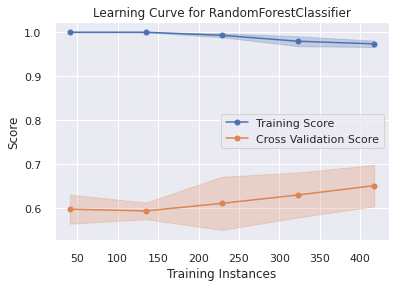

In [ ]:
from yellowbrick.model_selection import LearningCurve
learncurve = LearningCurve(clf).fit(X, y)
learncurve.show()

**ВЫВОД**: поигравшись с настройками **max_depth** было принято решение взять *данный параметр около 10 глубины деревьев.*

Если брать выше, то точность повышается **почти до 1.**

Если брать меньше точность предсказаний по методу случайного дерева **падает аж на 0.5 и ниже** что не соответсвует нормальным значениям предсказаний и модель будет обучена в последвии плохо!!!

**ИТОГ**: при параметрах  max_depth = 10 модель выдает около 0.6095238095238096 точности по тестовой выборке.

По графику мы можем видеть что модель явно **недообучилась** на тех данных которые мы ей даем

Text(0.5, 63.0, 'Предсказанные значения')

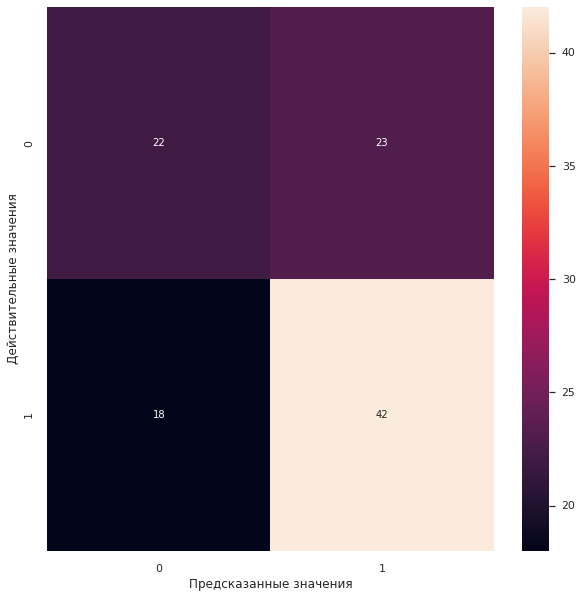

In [ ]:
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
class_names = [0, 1]
fig, ax = plt.subplots(figsize=(10,10))
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(y_test, y_pred)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

**По heatmap мы можем видеть в каких частях наша модель ошибается**

6. Оцените полученную модель с помощью метрик.

In [ ]:
dt = []
accur = metrics.accuracy_score(y_test, y_pred) # Метрика достоверности предсказания
dt.append(accur)
dt

[0.6095238095238096]

In [ ]:
dt2 = []
precision = metrics.precision_score(y_test, y_pred, average='macro') # Метрика точности
precision
dt2.append(precision)
dt2

[0.5980769230769232]

In [ ]:
dt3 = []
recall = metrics.recall_score(y_test, y_pred, average='macro') # Метрика полноты
recall
dt3.append(recall)
dt3

[0.5944444444444444]

В общем и целом можно сделать вывод что:


1.    Данная модель около 40%  не правильно классифицирует данные по категориям что показывает нам показатель **precision = 0.5980769230769232**

2.   Данная модель часто ошибается **accur = 0.6095238095238096**

3. Данная модель часто ошибается при соотнесении данных по "специфическим категориям"





7. Понизьте размерность данных с помощью метода главных компонент.

In [ ]:
from sklearn.cluster import KMeans;
# метод главных компонент PCA
from sklearn.decomposition import PCA;
# нормализация данных
from sklearn.preprocessing import normalize;


y2 = KMeans().fit_predict(new_data_2)

X2 = normalize(new_data_2);

x_PCA = PCA(n_components=2).fit_transform(X2,2);

print(x_PCA.shape)
x_PCA

(522, 2)


array([[-0.01619729,  0.00189653],
       [-0.01472423, -0.00116405],
       [-0.00970791, -0.00248088],
       ...,
       [-0.00968309,  0.00042186],
       [-0.00463822,  0.01637404],
       [-0.01370288,  0.00324562]])

<Figure size 432x288 with 0 Axes>

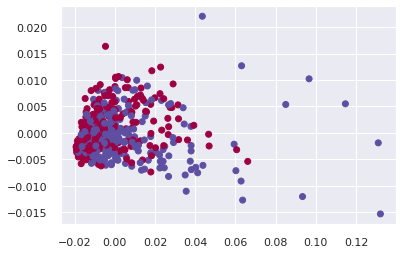

<Figure size 432x288 with 0 Axes>

In [ ]:
# Было в методичке не поняла что это такое
plt.scatter(x_PCA[:,0], x_PCA[:,1], c=target, cmap='Spectral')
plt.figure()

8. Обучите заново модель случайных лесов и оцените ее эффективность с помощью метрик.

In [ ]:
from sklearn.model_selection import train_test_split
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_PCA, y2, test_size=0.2, random_state=True)

In [ ]:
x_train2.shape

(417, 2)

In [ ]:
x_test2.shape

(105, 2)

In [ ]:
clf2 = RandomForestClassifier(max_depth=10, random_state=42)
clf2.fit(x_train2, y_train2)

RandomForestClassifier(max_depth=10, random_state=42)

In [ ]:
y_pred2 = clf2.predict(x_test2)
y_pred2

array([0, 0, 6, 7, 3, 0, 6, 3, 0, 7, 3, 0, 0, 6, 0, 0, 6, 0, 7, 7, 0, 3,
       4, 0, 7, 7, 3, 3, 0, 0, 7, 0, 3, 0, 1, 7, 7, 7, 0, 3, 7, 7, 7, 6,
       0, 0, 0, 4, 0, 0, 4, 0, 7, 0, 0, 4, 0, 3, 0, 5, 7, 0, 0, 6, 3, 5,
       7, 7, 3, 3, 6, 0, 7, 7, 0, 7, 3, 3, 1, 6, 1, 7, 1, 7, 0, 0, 7, 7,
       0, 0, 7, 3, 7, 1, 0, 1, 3, 3, 0, 0, 4, 3, 6, 6, 5], dtype=int32)

In [ ]:
print('Train: ', clf2.score(x_train2, y_train2))
print('Test: ',clf2.score(x_test2, y_test2))

Train:  0.973621103117506
Test:  0.6666666666666666


**Было**

Train:  0.9832134292565947
Test:  0.6095238095238096

**Стало**

Train:  0.973621103117506
Test:  0.6666666666666666

**Вывод:** точность предсказываний тестовой выборки повысилась **почти на 6%** после нормализации данных 

*Примечание:* модель строилась по тем же параметрам что и до нормализации данных

Text(0.5, 63.0, 'Предсказанные значения')

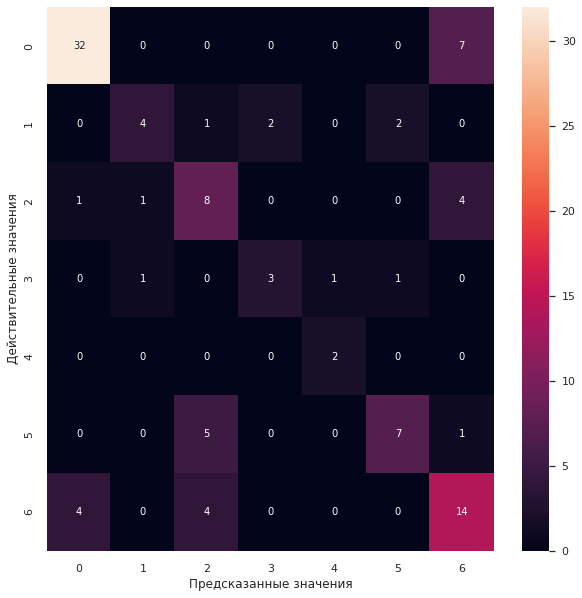

In [ ]:
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
class_names = [0, 1]
fig, ax = plt.subplots(figsize=(10,10))
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(y_test2, y_pred2)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

Проверим метрики

In [ ]:
accur2 = metrics.accuracy_score(y_test2, y_pred2) # Метрика достоверности предсказания
accur2
dt.append(accur2)
dt

[0.6095238095238096, 0.6666666666666666]

In [ ]:
precision2 = metrics.precision_score(y_test2, y_pred2, average='macro') # Метрика точности
precision2
dt2.append(precision2)
dt2

[0.5980769230769232, 0.6401577401577401]

In [ ]:
recall2 = metrics.recall_score(y_test2, y_pred2, average='macro') # Метрика полноты
recall2
dt3.append(recall2)
dt3

[0.5944444444444444, 0.6444587158872873]

In [ ]:
collected_data = []
collected_data.append(dt)
collected_data.append(dt2)
collected_data.append(dt3)
collected_data = pd.DataFrame(collected_data, columns = ['Было','Стало'])
collected_data

,Было,Стало
0,0.609524,0.666667
1,0.598077,0.640158
2,0.594444,0.644459


**Вывод:** после нормализации данных модель начала лучше предсказывать значения, лучше соотносить данные по категориям и специфике.

Выводим графики кривых обучения первого и второго случая

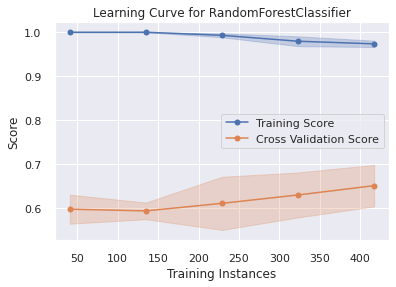

In [ ]:
from yellowbrick.model_selection import LearningCurve
learncurve = LearningCurve(clf).fit(X, y)
learncurve.show()

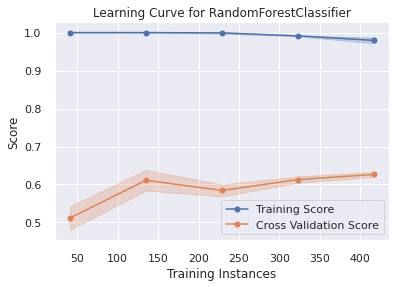

In [ ]:
from yellowbrick.model_selection import LearningCurve
learncurve = LearningCurve(clf2).fit(x_PCA, y2)
learncurve.show()

По сравнению с предыдущим разом по графику мы видим **явное улучшение ситуации по обучению модели**

9. Сделайте вывод о применимости модели.

**Выводы о применимости:**

1. Данная модель очень чувствительна к данным *(особенно к текстовым)* что уссложняет процесс обучения модели из-за первичной обработки данных

2. **Модель очень не любит когда ей дают NaN** в датасете и может выдавать недостоверные данные при обучении

